# **RQ1 Cifar**

## Defining the diversity functions GD (Geometric Diversity), STD and NCD (Normalized Compression Distance)

# **Dataset and Models**

In [ ]:
from numpy import argmax
import random
import seaborn as sbn
from numpy.random import rand, randn
from scipy.linalg import qr
from numpy import ones
from scipy import stats
import scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import linalg as LA
import  array
import math
from keras.utils import np_utils
from keras.models import Sequential
from sklearn import linear_model
import sklearn
from tabulate import tabulate
from math import sqrt
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.decomposition import PCA as sklearnPCA
import copy
import time
from keras import backend as K
import argparse
import shutil
import warnings
import keras.backend as KeyboardInterrupt
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.regularizers import l2
from keras.models import load_model, Model
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix
from keras import layers
import tensorflow as tf
from keras.datasets import mnist, cifar10 , fashion_mnist, cifar100
from keras.preprocessing.image import img_to_array, array_to_img
import sys
sys.path.append('..')

#MinMAx
def scale(X, x_min, x_max):
    nom = (X-X.min(axis=0))*(x_max-x_min)
    denom = X.max(axis=0) - X.min(axis=0)
    denom[denom==0] = 1
    return x_min + nom/denom 

!pip install -r requirements.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [ ]:
############################################## Dataset $ model  ########################################################################
#############################################Function description#######################################################################

#________________________________________________(dataset)___________________________________________________________
#It takes the name of the dataset , and corresponding model from the user then it preprocess the dataset and load the model.
#______________Input: arg ("cifar10","mnist")
#______________Output: 1- Training and Testing set of the given dataset
#______________________2- the noramlized version of feature matrix of the given dataset (VGG features)
#______________________3- load the trained model on the given dataset
#______________________4- path of the folder of stored random inputs and thier results

def dataset(arg, model_name):
  CLIP_MIN = -0.5
  CLIP_MAX = 0.5

  if arg=="mnist":
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = x_train.reshape(-1, 28, 28, 1)
    x_test = x_test.reshape(-1, 28, 28, 1)
    x_train = x_train.astype("float32")
    x_test = x_test.astype("float32")
    # ##Model
    if model_name=="LeNet5":
        model=load_model("/content/drive/MyDrive/sadl11/model/model_mnist_LeNet5.h5")
        path="/content/drive/MyDrive/RQ2_3/Correlation/BB_mnist_BB_LeNet5/Size"
    ##VGG feature extaction (4068)
    ##rank of features (2476)
    #You can use the stored verion or call vgg function to extract features(comment out the second line)
    MNIST_VGG=np.load("/content/drive/MyDrive/Extracted Features/MNIST/block5_conv3_3_3_512.npy")
    #_,MNIST_VGG=vgg16_features_GD("mnist")
    features_vgg=MNIST_VGG
    y_test = np_utils.to_categorical(y_test, 10)
    y_test=np.argmax(y_test, axis=1)  
    y_train = np_utils.to_categorical(y_train, 10)

  if arg=="cifar10":
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()
    x_train = x_train.astype("float32")
    x_test = x_test.astype("float32")
    if model_name=="12Conv":
      model = load_model('/content/drive/MyDrive/sadl11/model/model_cifar.h5')
      path="/content/drive/MyDrive/RQ2_3/Correlation/BB_cifar_BB_vgg_12conv/"
       #VGG feature extaction (4068)
    #rank of features (3845)
    #You can use the stored verion or call vgg function to extract features (comment out the second line)
    Cifar_VGG=np.load("/content/drive/MyDrive/Extracted Features/Cifar10/x_cifar_inputshape48_block5_conv3.npy")
    #_,Cifar_VGG=vgg16_features_GD("cifar10")
    features_vgg=Cifar_VGG
    y_test = np_utils.to_categorical(y_test, 10)
    y_test=np.argmax(y_test, axis=1)  
    y_train = np_utils.to_categorical(y_train, 10)
  
  x_train = (x_train / 255.0) - (1.0 - CLIP_MAX)
  x_test = (x_test / 255.0) - (1.0 - CLIP_MAX)

  return x_train, y_train, x_test, y_test,features_vgg , model, path


In [ ]:
############################################################## Call_functions  ##########################################

data_name=input("Enter the dataset             mnist       /        cifar10       / Fashion_mnist /  SVHN  : ")
model_name=input("Enter the model name    LeNet1 or LeNet5/  12Conv or ResNet20  /     LeNet4    /  LeNet5 : ")
x_train, y_train, x_test, y_test, features, model, path= dataset(data_name, model_name)
print(data_name, model_name)
model.summary()
print("x_test.shape", x_test.shape)

Enter the dataset             mnist       /        cifar10       / Fashion_mnist /  SVHN  : cifar10
Enter the model name    LeNet1 or LeNet5/  12Conv or ResNet20  /     LeNet4    /  LeNet5 : 12Conv
cifar10 12Conv
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_2 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                   

In [ ]:
X_scaled=features

In [ ]:
import bz2
from copy import deepcopy
import numpy as np
import random
import seaborn as sbn
from numpy.random import rand, randn


def NCD_bz(X_data):

  res =0
  Set_comp=[]
  X1=deepcopy(list(X_data))

  NCD1=[]
  for ll in range(len(X_data)) :
    if len(X1)==2: 
      x_y = bytes(X1[0]) + bytes(X1[1])  # compress file 2
      x_y_comp = bz2.compress(x_y)  # compress file concatenated 
      ncd = (len(x_y_comp) - min(len(bz2.compress(bytes(X1[0]))), len(bz2.compress(bytes(X1[1]))))) / \
      max(len(bz2.compress(bytes(X1[0]))), len(bz2.compress(bytes(X1[1]))))
      NCD1.append(ncd)
      break
    Set_comp=[]
    Cx=[]
    for i in range(len(X1)):
      Cx.append(len(bz2.compress(bytes(X1[i]))))
      if i==0:
        sumYk=deepcopy(bytes(X1[i]))
      else:
        sumYk=sumYk+bytes(X1[i])
      # print(Cx)
      # print("i",i)
      X_copy=deepcopy(X1)
      res =0
      for j in X_copy:
        if res==0:
          res = deepcopy(bytes(j))
        else:
          res=res+bytes(j)
      Set_comp.append(len(bz2.compress(res)))
    indexmax=np.argmax(Set_comp)
    maxCk=max(Set_comp)
    minCx=min(Cx)
    NCD1.append((len(bz2.compress(sumYk))-minCx )/maxCk)
    X1.pop(indexmax)
  return max(NCD1)

In [ ]:
from numpy import linalg as LA
def STD(x_sample):
  std_f=np.std(x_sample, axis=0)
  L2norm=LA.norm(std_f, 2)
  L1norm=LA.norm(std_f, 1)
  print("shape x- sample", x_sample.shape)
  rrr=np.linalg.matrix_rank(x_sample)
  print("rank of feature matrix", rrr)
  print("L2norm", L2norm)
  print("L1norm", L1norm)
  return L1norm

In [ ]:


def RQ1_new(size,label,subset):
  if (subset==None):
    Ldet=0.0
    determinant=0.0
    tt=0
    while (Ldet==0.0):
      k=0
      random_sample=[]
      kk=np.argwhere(y_test==label)
      sh=kk.shape
      kk=kk.reshape(sh[0])
      kk=set(kk)
      random_s=random.sample(kk,size)
      print(random_s)
      x_sample = np.zeros((SIZE,4608))
      conv_output=X_scaled
      print("sample", x_sample.shape)
      i=0
      print("Random_indexes",random_s)
      
      random_sample=copy.deepcopy(random_s)
      random_sample.sort()
      for L in random_sample :
        x_sample[i,:]=conv_output[L,:]
        i=i+1

      #diversity score
      h=np.dot(x_sample,x_sample.T)
      sign, Ldet=np.linalg.slogdet(h)
      print("Ldet2", Ldet, sign)
      print("size h", h.shape)
      print("tt",tt)
      tt=tt+1
    std_score=STD(x_sample)
    ncd_score=NCD_bz(x_sample)
  else:
    Ldet=0.0
    determinant=0.0
    tt=0
    while (Ldet==0.0):
      k=0
      random_sample=[]
      kk=np.argwhere(y_test==label)
      sh=kk.shape
      kk=kk.reshape(sh[0])
      kk=set(kk)
      Random_indexes=random.sample(kk,size)
      print(Random_indexes)
      x_sample = np.zeros((SIZE,4608))
      conv_output=X_scaled
      print("sample", x_sample.shape)
      i=0
      random_s=list(subset)+list(Random_indexes)
      print("Random_indexes",random_s)
      print("len",len(random_s))
      random_sample=copy.deepcopy(random_s)
      random_sample.sort()
      # P = np.zeros((size,32,32,3))
      for L in random_sample :
        x_sample[i,:]=conv_output[L,:]
        # P[i]=x_test[L,:,:,:]
        # yt[i]=y_test[L]
        i=i+1

      #diversity score
      h=np.dot(x_sample,x_sample.T)
      sign, Ldet=np.linalg.slogdet(h)
      print("Ldet2", Ldet, sign)
      print("size h", h.shape)
      print("tt",tt)
      tt=tt+1
    #remove yy=0
    # yy=0
    std_score=STD(x_sample)
    ncd_score=NCD_bz(x_sample)
  return Ldet , std_score , ncd_score


In [ ]:
GD_0=[]
GD_1=[]
GD_2=[]
GD_3=[]


STD_0=[]
STD_1=[]
STD_2=[]
STD_3=[]



NCD_0=[]
NCD_1=[]
NCD_2=[]
NCD_3=[]


SIZE=100
# for start1 in range(10):
allclasses=[0,1,2,3,4,5,6,7,8,9]
start1=4
R=0

C_classes=1
for i in range(20):
  h=RQ1_new(SIZE,start1 , None)
  GD_0.append(h[0])
  STD_0.append(h[1])
  NCD_0.append(h[2])
  R=R+1


R=0
C_classes=2
allclasses.remove(start1)
# c2=random.choice(allclasses)
c2=6
for i in range(20):
  subset= np.load("/content/drive/MyDrive/RQ1new/GD_Cifar/Index_"+str(start1)+"_"+str(C_classes-1)+"classes_"+str(R)+".npy")
  subset=list(subset)
  new=len(subset)//2
  new_list= list(subset[:new])
  h=RQ1_new(SIZE-(len(new_list)),c2 , new_list)
  GD_1.append(h[0])
  STD_1.append(h[1])
  NCD_1.append(h[2])
  R=R+1
R=0
C_classes=3
allclasses.remove(c2)
# c3=random.choice(allclasses)
c3=8
for i in range(20):
  subset= np.load("/content/drive/MyDrive/RQ1new/GD_Cifar/Index_"+str(c2)+"_"+str(C_classes-1)+"classes_"+str(R)+".npy")
  subset=list(subset)
  new_list= list(subset[:33]) + list(subset[33:33+33])
  h=RQ1_new(SIZE-(len(new_list)),c3 , new_list)
  GD_2.append(h[0])
  STD_2.append(h[1])
  NCD_2.append(h[2])
  R=R+1

R=0
C_classes=4
# all
# allclasses.remove(c3)
# c4=random.choice(allclasses)
c4=7
for i in range(20):
  subset= np.load("/content/drive/MyDrive/RQ1new/GD_Cifar/Index_"+str(c3)+"_"+str(C_classes-1)+"classes_"+str(R)+".npy")
  subset=list(subset)
  last=len(subset)//3
  new=len(subset)//4
  new_list= list(subset[:25]) + list(subset[33:33+25]) + list(subset[33+34:25+(33+34)])
  h=RQ1_new(SIZE-(len(new_list)),c4 , new_list)
  GD_3.append(h[0])
  STD_3.append(h[1])
  NCD_3.append(h[2])
  R=R+1



In [ ]:

GD_4=[]
GD_5=[]
GD_6=[]
GD_7=[]
GD_8=[]
GD_9=[]
STD_4=[]
STD_5=[]
STD_6=[]
STD_7=[]
STD_8=[]
STD_9=[]
NCD_4=[]
NCD_5=[]
NCD_6=[]
NCD_7=[]
NCD_8=[]
NCD_9=[]

SIZE=100



# all
# allclasses.remove(c3)
# c4=random.choice(allclasses)
c4=7
R=0
C_classes=5
# allclasses.remove(c4)
c5=2
for i in range(20):
  subset= np.load("/content/drive/MyDrive/RQ1new/GD_Cifar/Index_"+str(c4)+"_"+str(C_classes-1)+"classes_"+str(R)+".npy")
  subset=list(subset)
  last=len(subset)//4
  new=len(subset)//5
  new_list= list(subset[:20]) + list(subset[25:20+25]) + list(subset[25*2:20+(25*2)]) + list(subset[25*3:20+(25*3)])
  h=RQ1_new(SIZE-(len(new_list)),c5 , new_list)
  GD_4.append(h[0])
  STD_4.append(h[1])
  NCD_4.append(h[2])
  R=R+1

R=0
C_classes=6
# allclasses.remove(c5)
c6=0
for i in range(20):
  subset= np.load("/content/drive/MyDrive/RQ1new/GD_Cifar/Index_"+str(c5)+"_"+str(C_classes-1)+"classes_"+str(R)+".npy")
  subset=list(subset)
  last=len(subset)//5
  new=len(subset)//6
  new_list= list(subset[:16]) + list(subset[20:16+20]) + list(subset[40:17+40]) + list(subset[60:17+60])+ list(subset[80:17+80])
  print(")))))))))))))))))))))))))))))))))))))))))))))))))))))))))))",SIZE-(len(new_list)))
  h=RQ1_new(SIZE-(len(new_list)),c6 , new_list)
  GD_5.append(h[0])
  STD_5.append(h[1])
  NCD_5.append(h[2])
  R=R+1

In [ ]:
R=0
C_classes=7
# allclasses.remove(c6)

c7=3
for i in range(20):
  subset= np.load("/content/drive/MyDrive/RQ1new/GD_Cifar/Index_"+str(c6)+"_"+str(C_classes-1)+"classes_"+str(R)+".npy")
  subset=list(subset)
  last=len(subset)//6
  new=len(subset)//7
  new_list= list(subset[:14]) + list(subset[16:14+16]) + list(subset[16*2:14+(16*2)]) + list(subset[17+16*2:14+(17+16*2)])+ list(subset[17*2+16*2:14+(17*2+16*2)])+list(subset[17*3+16*2:15+(17*3+16*2)])
  h=RQ1_new(SIZE-(len(new_list)),c7 , new_list)
  GD_6.append(h[0])
  STD_6.append(h[1])
  NCD_6.append(h[2])
  R=R+1

R=0
C_classes=8
# allclasses.remove(c7)
c8=1
for i in range(20):
  subset= np.load("/content/drive/MyDrive/RQ1new/GD_Cifar/Index_"+str(c7)+"_"+str(C_classes-1)+"classes_"+str(R)+".npy")
  subset=list(subset)
  last=len(subset)//7
  new=len(subset)//8

  new_list= list(subset[:12]) + list(subset[14:12+14]) + list(subset[14*2:12+(14*2)]) + list(subset[14*3:12+(14*3)])+ list(subset[14*4:13+(14*4)])+list(subset[14*5:13+(14*5)])+list(subset[14*5+15:13+(14*5+15)])
  h=RQ1_new(SIZE-(len(new_list)),c8 , new_list)
  GD_7.append(h[0])
  STD_7.append(h[1])
  NCD_7.append(h[2])
  R=R+1

R=0
C_classes=9
# allclasses.remove(c8)
c9=5

for i in range(20):
  subset= np.load("/content/drive/MyDrive/RQ1new/GD_Cifar/Index_"+str(c8)+"_"+str(C_classes-1)+"classes_"+str(R)+".npy")
  subset=list(subset)
  last=len(subset)//8
  new=len(subset)//9
  new_list= list(subset[:11]) + list(subset[12:12+11]) + list(subset[12*2:11+(12*2)]) + list(subset[12*3:11+(12*3)])+ list(subset[12*4:11+(12*4)])+list(subset[12*4+13:11+(12*4+13)])+list(subset[12*4+13*2:11+(12*4+13*2)])+ list(subset[12*4+13*3:11+(12*4+13*3)])
  h=RQ1_new(SIZE-(len(new_list)),c9 , new_list)
  GD_8.append(h[0])
  STD_8.append(h[1])
  NCD_8.append(h[2])
  R=R+1

R=0
C_classes=10
# allclasses.remove(c9)
c10=9
for i in range(20):
  subset= np.load("/content/drive/MyDrive/RQ1new/GD_Cifar/Index_"+str(c9)+"_"+str(C_classes-1)+"classes_"+str(R)+".npy")
  subset=list(subset)
  last=len(subset)//9
  new=len(subset)//10
  new_list= list(subset[:10]) + list(subset[11:11+10]) + list(subset[11*2:10+(11*2)]) + list(subset[11*3:10+(11*3)])+ list(subset[11*4:10+(11*4)])+list(subset[11*5:10+(11*5)])+list(subset[11*6:10+(11*6)])+ list(subset[11*7:10+(11*7)])+list(subset[11*8:10+(11*8)])
  h=RQ1_new(SIZE-(len(new_list)),c10 , new_list)
  GD_9.append(h[0])
  STD_9.append(h[1])
  NCD_9.append(h[2])
  R=R+1

In [ ]:
import numpy as np
GD_0=np.load('/content/drive/MyDrive/RQ1new/GD_Cifar/metrics/GD_0.npy')
GD_1=np.load('/content/drive/MyDrive/RQ1new/GD_Cifar/metrics/GD_1.npy')
GD_2=np.load('/content/drive/MyDrive/RQ1new/GD_Cifar/metrics/GD_2.npy')
GD_3=np.load('/content/drive/MyDrive/RQ1new/GD_Cifar/metrics/GD_3.npy')
GD_4=np.load('/content/drive/MyDrive/RQ1new/GD_Cifar/metrics/GD_4.npy')
GD_5=np.load('/content/drive/MyDrive/RQ1new/GD_Cifar/metrics/GD_5.npy')
GD_6=np.load('/content/drive/MyDrive/RQ1new/GD_Cifar/metrics/GD_6.npy')
GD_7=np.load('/content/drive/MyDrive/RQ1new/GD_Cifar/metrics/GD_7.npy')
GD_8=np.load('/content/drive/MyDrive/RQ1new/GD_Cifar/metrics/GD_8.npy')
GD_9=np.load('/content/drive/MyDrive/RQ1new/GD_Cifar/metrics/GD_9.npy')

STD_0=np.load('/content/drive/MyDrive/RQ1new/GD_Cifar/metrics/STD_0.npy')
STD_1=np.load('/content/drive/MyDrive/RQ1new/GD_Cifar/metrics/STD_1.npy')
STD_2=np.load('/content/drive/MyDrive/RQ1new/GD_Cifar/metrics/STD_2.npy')
STD_3=np.load('/content/drive/MyDrive/RQ1new/GD_Cifar/metrics/STD_3.npy')
STD_4=np.load('/content/drive/MyDrive/RQ1new/GD_Cifar/metrics/STD_4.npy')
STD_5=np.load('/content/drive/MyDrive/RQ1new/GD_Cifar/metrics/STD_5.npy')
STD_6=np.load('/content/drive/MyDrive/RQ1new/GD_Cifar/metrics/STD_6.npy')
STD_7=np.load('/content/drive/MyDrive/RQ1new/GD_Cifar/metrics/STD_7.npy')
STD_8=np.load('/content/drive/MyDrive/RQ1new/GD_Cifar/metrics/STD_8.npy')
STD_9=np.load('/content/drive/MyDrive/RQ1new/GD_Cifar/metrics/STD_9.npy')

NCD_0=np.load('/content/drive/MyDrive/RQ1new/GD_Cifar/metrics/NCD_0.npy')
NCD_1=np.load('/content/drive/MyDrive/RQ1new/GD_Cifar/metrics/NCD_1.npy')
NCD_2=np.load('/content/drive/MyDrive/RQ1new/GD_Cifar/metrics/NCD_2.npy')
NCD_3=np.load('/content/drive/MyDrive/RQ1new/GD_Cifar/metrics/NCD_3.npy')
NCD_4=np.load('/content/drive/MyDrive/RQ1new/GD_Cifar/metrics/NCD_4.npy')
NCD_5=np.load('/content/drive/MyDrive/RQ1new/GD_Cifar/metrics/NCD_5.npy')
NCD_6=np.load('/content/drive/MyDrive/RQ1new/GD_Cifar/metrics/NCD_6.npy')
NCD_7=np.load('/content/drive/MyDrive/RQ1new/GD_Cifar/metrics/NCD_7.npy')
NCD_8=np.load('/content/drive/MyDrive/RQ1new/GD_Cifar/metrics/NCD_8.npy')
NCD_9=np.load('/content/drive/MyDrive/RQ1new/GD_Cifar/metrics/NCD_9.npy')


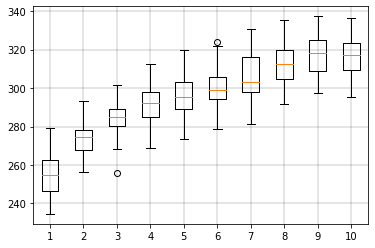

In [ ]:

import matplotlib.pyplot as plt
import pandas as pd
  
dataGD_R1 = {'1': np.array(GD_0).tolist(),'2': np.array(GD_1).tolist(),'3': np.array(GD_2).tolist(),'4': np.array(GD_3).tolist(),'5': np.array(GD_4).tolist(),'6': np.array(GD_5).tolist(),'7': np.array(GD_6).tolist(),'8': np.array(GD_7).tolist(),'9': np.array(GD_8).tolist(),'10': np.array(GD_9).tolist()}
dataSTD_R1= {'1': np.array(STD_0).tolist(),'2': np.array(STD_1).tolist(),'3': np.array(STD_2).tolist(),'4': np.array(STD_3).tolist(),'5': np.array(STD_4).tolist(),'6': np.array(STD_5).tolist(),'7': np.array(STD_6).tolist(),'8': np.array(STD_7).tolist(),'9': np.array(STD_8).tolist(),'10': np.array(STD_9).tolist()}
dataNCD_R1= {'1': np.array(NCD_0).tolist(),'2': np.array(NCD_1).tolist(),'3': np.array(NCD_2).tolist(),'4': np.array(NCD_3).tolist(),'5': np.array(NCD_4).tolist(),'6': np.array(NCD_5).tolist(),'7': np.array(NCD_6).tolist(),'8': np.array(NCD_7).tolist(),'9': np.array(NCD_8).tolist(),'10': np.array(NCD_9).tolist()}
plt.figure()
plt.grid(color='black', linestyle='-', linewidth=0.2)
plt.boxplot(dataSTD_R1.values())
plt.xticks(range(1, len(dataSTD_R1.keys()) + 1), dataSTD_R1.keys())
plt.show()

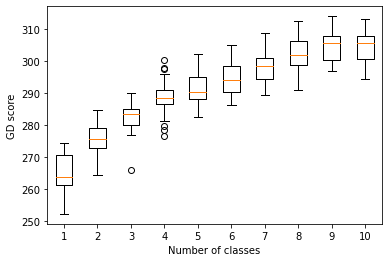

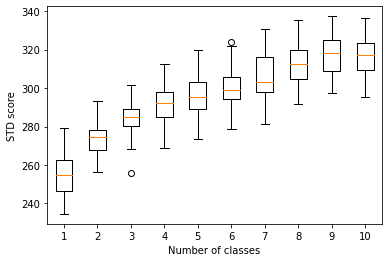

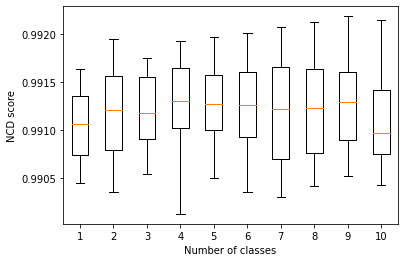

In [ ]:
import matplotlib.pyplot as plt
for i in [dataGD_R1,dataSTD_R1,dataNCD_R1 ]:
  plt.boxplot(i.values())
  plt.xticks([1,2,3,4,5,6,7,8,9,10], [1,2,3,4,5,6,7,8,9,10])
  # plt.title("Cifar-10")
  plt.xlabel("Number of classes")
  plt.grid(color='black', linestyle='', linewidth=0.2)
  if i==dataGD_R1:
    # plt.yticks([900,950,1000,1050,1100,1150,1200,1250])
    plt.ylabel("GD score")
    plt.savefig('/content/drive/MyDrive/RQ1new/GD_Cifar/fig/R1_GD_C3.pdf', bbox_inches='tight')
    plt.show()
  if i==dataSTD_R1:
    plt.ylabel("STD score")
    plt.savefig('/content/drive/MyDrive/RQ1new/GD_Cifar/fig/R1_STD_C3.pdf', bbox_inches='tight')
    plt.show()
  if i==dataNCD_R1:
    plt.ylabel("NCD score")
    plt.savefig('/content/drive/MyDrive/RQ1new/GD_Cifar/fig/R1_NCD_C3.pdf', bbox_inches='tight')
    plt.show()

# **RQ1 MNIST**

In [ ]:
import bz2
from copy import deepcopy
import numpy as np

# X_data=[x,y,z,f]
def NCD_bz(X_data):

  res =0
  Set_comp=[]
  X1=deepcopy(list(X_data))
  # print("len",len(X1))
  NCD1=[]
  for ll in range(len(X_data)) :
    # print("len Yk",len(X1))
    if len(X1)==2: 
      x_y = bytes(X1[0]) + bytes(X1[1])  # compress file 2
      x_y_comp = bz2.compress(x_y)  # compress file concatenated 
      ncd = (len(x_y_comp) - min(len(bz2.compress(bytes(X1[0]))), len(bz2.compress(bytes(X1[1]))))) / \
      max(len(bz2.compress(bytes(X1[0]))), len(bz2.compress(bytes(X1[1]))))
      NCD1.append(ncd)
      break
    Set_comp=[]
    Cx=[]
    for i in range(len(X1)):
      Cx.append(len(bz2.compress(bytes(X1[i]))))
      if i==0:
        sumYk=deepcopy(bytes(X1[i]))
      else:
        sumYk=sumYk+bytes(X1[i])
      # print(Cx)
      # print("i",i)
      X_copy=deepcopy(X1)
      # print(len(X_copy.pop(i)))
      # print("len",len(X_copy))
      res =0
      for j in X_copy:
        if res==0:
          res = deepcopy(bytes(j))
        else:
          res=res+bytes(j)
      Set_comp.append(len(bz2.compress(res)))
    indexmax=np.argmax(Set_comp)
    maxCk=max(Set_comp)
    minCx=min(Cx)
    NCD1.append((len(bz2.compress(sumYk))-minCx )/maxCk)
    X1.pop(indexmax)
  return max(NCD1)

In [ ]:

X_scaled=np.load("/content/drive/MyDrive/Extracted Features/MNIST/block5_conv3_3*3*512.npy")

model=load_model("/content/drive/MyDrive/sadl11/model/model_mnist_LeNet5.h5")

In [ ]:


import numpy as np
import time
import argparse

from tqdm import tqdm
from keras.datasets import mnist, cifar10
from keras.models import load_model, Model

CLIP_MIN = -0.5
CLIP_MAX = 0.5

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
x_train = x_train.astype("float32")
x_train = (x_train / 255.0) - (1.0 - CLIP_MAX)
x_test = x_test.astype("float32")
x_test = (x_test / 255.0) - (1.0 - CLIP_MAX)

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
import copy
def RQ1_new(size,label,subset):
  if (subset==None):
    Ldet=0.0
    determinant=0.0
    tt=0
    while (Ldet==0.0):
      k=0
      random_sample=[]
      kk=np.argwhere(y_test==label)
      sh=kk.shape
      kk=kk.reshape(sh[0])
      kk=set(kk)
      random_s=random.sample(kk,size)
      print(random_s)
      x_sample = np.zeros((SIZE,4608))
      conv_output=X_scaled
      print("sample", x_sample.shape)
      i=0
      print("Random_indexes",random_s)
      
      random_sample=copy.deepcopy(random_s)
      random_sample.sort()
      for L in random_sample :
        x_sample[i,:]=conv_output[L,:]
        i=i+1

      #diversity score
      h=np.dot(x_sample,x_sample.T)
      sign, Ldet=np.linalg.slogdet(h)
      print("Ldet2", Ldet, sign)
      print("size h", h.shape)
      print("tt",tt)
      tt=tt+1
    std_score=STD(x_sample)
    ncd_score=NCD_bz(x_sample)
  else:
    Ldet=0.0
    determinant=0.0
    tt=0
    while (Ldet==0.0):
      k=0
      random_sample=[]
      kk=np.argwhere(y_test==label)
      sh=kk.shape
      kk=kk.reshape(sh[0])
      kk=set(kk)
      Random_indexes=random.sample(kk,size)
      print(Random_indexes)
      x_sample = np.zeros((SIZE,4608))
      conv_output=X_scaled
      print("sample", x_sample.shape)
      i=0
      # print("Random_indexes",Random_indexes)
      random_s=list(subset)+list(Random_indexes)
      print("Random_indexes",random_s)
      print("len",len(random_s))
      random_sample=copy.deepcopy(random_s)
      random_sample.sort()
      # P = np.zeros((size,32,32,3))
      for L in random_sample :
        x_sample[i,:]=conv_output[L,:]
        # P[i]=x_test[L,:,:,:]
        # yt[i]=y_test[L]
        i=i+1

      #diversity score
      h=np.dot(x_sample,x_sample.T)
      sign, Ldet=np.linalg.slogdet(h)
      print("Ldet2", Ldet, sign)
      print("size h", h.shape)
      print("tt",tt)
      tt=tt+1
    #remove yy=0
    # yy=0
    std_score=STD(x_sample)
    ncd_score=NCD_bz(x_sample)
  return Ldet , std_score , ncd_score


In [ ]:
from numpy import linalg as LA
def STD(x_sample):
  std_f=np.std(x_sample, axis=0)
  L2norm=LA.norm(std_f, 2)
  L1norm=LA.norm(std_f, 1)
  print("shape x- sample", x_sample.shape)
  rrr=np.linalg.matrix_rank(x_sample)
  print("rank of feature matrix", rrr)
  print("L2norm", L2norm)
  print("L1norm", L1norm)
  return L1norm

In [ ]:
GD_0=[]
GD_1=[]
GD_2=[]
GD_3=[]


STD_0=[]
STD_1=[]
STD_2=[]
STD_3=[]



NCD_0=[]
NCD_1=[]
NCD_2=[]
NCD_3=[]


SIZE=100
# for start1 in range(10):
allclasses=[0,1,2,3,4,5,6,7,8,9]
start1=1
c2=0
c3=6
c4=2
c5=8
c6=9
c7=4
c8=7
c9=3
c10=5
R=0

C_classes=1
for i in range(20):
  h=RQ1_new(SIZE,start1 , None)
  GD_0.append(h[0])
  STD_0.append(h[1])
  NCD_0.append(h[2])
  R=R+1
R=0
C_classes=2
allclasses.remove(start1)
# c2=random.choice(allclasses)
# c2=6
for i in range(20):
  subset= np.load("/content/drive/MyDrive/RQ1new/GD_MNIST/Index_"+str(start1)+"_"+str(C_classes-1)+"classes_"+str(R)+".npy")
  subset=list(subset)
  new=len(subset)//2
  new_list= list(subset[:new])
  h=RQ1_new(SIZE-(len(new_list)),c2 , new_list)
  GD_1.append(h[0])
  STD_1.append(h[1])
  NCD_1.append(h[2])
  R=R+1
R=0
C_classes=3
allclasses.remove(c2)
# c3=random.choice(allclasses)
# c3=8
for i in range(20):
  subset= np.load("/content/drive/MyDrive/RQ1new/GD_MNIST/Index_"+str(c2)+"_"+str(C_classes-1)+"classes_"+str(R)+".npy")
  subset=list(subset)
  new_list= list(subset[:33]) + list(subset[33:33+33])
  h=RQ1_new(SIZE-(len(new_list)),c3 , new_list)
  GD_2.append(h[0])
  STD_2.append(h[1])
  NCD_2.append(h[2])
  R=R+1

R=0
C_classes=4
# all
# allclasses.remove(c3)
c4=random.choice(allclasses)
c4=7
for i in range(20):
  subset= np.load("/content/drive/MyDrive/RQ1new/GD_MNIST/Index_"+str(c3)+"_"+str(C_classes-1)+"classes_"+str(R)+".npy")
  subset=list(subset)
  last=len(subset)//3
  new=len(subset)//4
  new_list= list(subset[:25]) + list(subset[33:33+25]) + list(subset[33+34:25+(33+34)])
  h=RQ1_new(SIZE-(len(new_list)),c4 , new_list)
  GD_3.append(h[0])
  STD_3.append(h[1])
  NCD_3.append(h[2])
  R=R+1

In [ ]:

GD_4=[]
GD_5=[]
GD_6=[]
GD_7=[]
GD_8=[]
GD_9=[]
STD_4=[]
STD_5=[]
STD_6=[]
STD_7=[]
STD_8=[]
STD_9=[]
NCD_4=[]
NCD_5=[]
NCD_6=[]
NCD_7=[]
NCD_8=[]
NCD_9=[]

SIZE=100

start1=1
c2=0
c3=6
c4=2
c5=8
c6=9
c7=4
c8=7
c9=3
c10=5


R=0
C_classes=5
# allclasses.remove(c4)

# c5=2
for i in range(20):
  subset= np.load("/content/drive/MyDrive/RQ1new/GD_MNIST/Index_"+str(c4)+"_"+str(C_classes-1)+"classes_"+str(R)+".npy")
  subset=list(subset)
  last=len(subset)//4
  new=len(subset)//5
  new_list= list(subset[:20]) + list(subset[25:20+25]) + list(subset[25*2:20+(25*2)]) + list(subset[25*3:20+(25*3)])
  h=RQ1_new(SIZE-(len(new_list)),c5 , new_list)
  GD_4.append(h[0])
  STD_4.append(h[1])
  NCD_4.append(h[2])
  R=R+1
R=0
C_classes=6
# allclasses.remove(c5)
# c6=0
for i in range(20):
  subset= np.load("/content/drive/MyDrive/RQ1new/GD_MNIST/Index_"+str(c5)+"_"+str(C_classes-1)+"classes_"+str(R)+".npy")
  subset=list(subset)
  last=len(subset)//5
  new=len(subset)//6
  print("newwwwwwwwwwwww",new)
  new_list= list(subset[:16]) + list(subset[20:16+20]) + list(subset[40:17+40]) + list(subset[60:17+60])+ list(subset[80:17+80])
  print(")))))))))))))))))))))))))))))))))))))))))))))))))))))))))))",SIZE-(len(new_list)))
  h=RQ1_new(SIZE-(len(new_list)),c6 , new_list)
  GD_5.append(h[0])
  STD_5.append(h[1])
  NCD_5.append(h[2])
  R=R+1



R=0
C_classes=7
# allclasses.remove(c6)

# c7=3
for i in range(20):
  subset= np.load("/content/drive/MyDrive/RQ1new/GD_MNIST/Index_"+str(c6)+"_"+str(C_classes-1)+"classes_"+str(R)+".npy")
  subset=list(subset)
  last=len(subset)//6
  new=len(subset)//7
  new_list= list(subset[:14]) + list(subset[16:14+16]) + list(subset[16*2:14+(16*2)]) + list(subset[17+16*2:14+(17+16*2)])+ list(subset[17*2+16*2:14+(17*2+16*2)])+list(subset[17*3+16*2:15+(17*3+16*2)])
  h=RQ1_new(SIZE-(len(new_list)),c7 , new_list)
  GD_6.append(h[0])
  STD_6.append(h[1])
  NCD_6.append(h[2])
  R=R+1
R=0
C_classes=8
# allclasses.remove(c7)
# c8=1
for i in range(20):
  subset= np.load("/content/drive/MyDrive/RQ1new/GD_MNIST/Index_"+str(c7)+"_"+str(C_classes-1)+"classes_"+str(R)+".npy")
  subset=list(subset)
  last=len(subset)//7
  new=len(subset)//8

  new_list= list(subset[:12]) + list(subset[14:12+14]) + list(subset[14*2:12+(14*2)]) + list(subset[14*3:12+(14*3)])+ list(subset[14*4:13+(14*4)])+list(subset[14*5:13+(14*5)])+list(subset[14*5+15:13+(14*5+15)])
  h=RQ1_new(SIZE-(len(new_list)),c8 , new_list)
  GD_7.append(h[0])
  STD_7.append(h[1])
  NCD_7.append(h[2])
  R=R+1
R=0
C_classes=9
# allclasses.remove(c8)
# c9=5

for i in range(20):
  subset= np.load("/content/drive/MyDrive/RQ1new/GD_MNIST/Index_"+str(c8)+"_"+str(C_classes-1)+"classes_"+str(R)+".npy")
  subset=list(subset)
  last=len(subset)//8
  new=len(subset)//9
  new_list= list(subset[:11]) + list(subset[12:12+11]) + list(subset[12*2:11+(12*2)]) + list(subset[12*3:11+(12*3)])+ list(subset[12*4:11+(12*4)])+list(subset[12*4+13:11+(12*4+13)])+list(subset[12*4+13*2:11+(12*4+13*2)])+ list(subset[12*4+13*3:11+(12*4+13*3)])
  h=RQ1_new(SIZE-(len(new_list)),c9 , new_list)
  GD_8.append(h[0])
  STD_8.append(h[1])
  NCD_8.append(h[2])
  R=R+1
np.save("/content/drive/MyDrive/RQ1new/GD_MNIST/metrics/NCD_8",NCD_8)
np.save("/content/drive/MyDrive/RQ1new/GD_MNIST/metrics/STD_8",STD_8)
np.save("/content/drive/MyDrive/RQ1new/GD_MNIST/metrics/GD_8",GD_8)
R=0
C_classes=10
# allclasses.remove(c9)
# c10=9
for i in range(20):
  subset= np.load("/content/drive/MyDrive/RQ1new/GD_MNIST/Index_"+str(c9)+"_"+str(C_classes-1)+"classes_"+str(R)+".npy")
  subset=list(subset)
  last=len(subset)//9
  new=len(subset)//10
  new_list= list(subset[:10]) + list(subset[11:11+10]) + list(subset[11*2:10+(11*2)]) + list(subset[11*3:10+(11*3)])+ list(subset[11*4:10+(11*4)])+list(subset[11*5:10+(11*5)])+list(subset[11*6:10+(11*6)])+ list(subset[11*7:10+(11*7)])+list(subset[11*8:10+(11*8)])
  h=RQ1_new(SIZE-(len(new_list)),c10 , new_list)
  GD_9.append(h[0])
  STD_9.append(h[1])
  NCD_9.append(h[2])
  R=R+1

In [ ]:
import numpy as np
GD_0=np.load('/content/drive/MyDrive/RQ1new/GD_MNIST/metrics/GD_0.npy')
GD_1=np.load('/content/drive/MyDrive/RQ1new/GD_MNIST/metrics/GD_1.npy')
GD_2=np.load('/content/drive/MyDrive/RQ1new/GD_MNIST/metrics/GD_2.npy')
GD_3=np.load('/content/drive/MyDrive/RQ1new/GD_MNIST/metrics/GD_3.npy')
GD_4=np.load('/content/drive/MyDrive/RQ1new/GD_MNIST/metrics/GD_4.npy')
GD_5=np.load('/content/drive/MyDrive/RQ1new/GD_MNIST/metrics/GD_5.npy')
GD_6=np.load('/content/drive/MyDrive/RQ1new/GD_MNIST/metrics/GD_6.npy')
GD_7=np.load('/content/drive/MyDrive/RQ1new/GD_MNIST/metrics/GD_7.npy')
GD_8=np.load('/content/drive/MyDrive/RQ1new/GD_MNIST/metrics/GD_8.npy')
GD_9=np.load('/content/drive/MyDrive/RQ1new/GD_MNIST/metrics/GD_9.npy')

STD_0=np.load('/content/drive/MyDrive/RQ1new/GD_MNIST/metrics/STD_0.npy')
STD_1=np.load('/content/drive/MyDrive/RQ1new/GD_MNIST/metrics/STD_1.npy')
STD_2=np.load('/content/drive/MyDrive/RQ1new/GD_MNIST/metrics/STD_2.npy')
STD_3=np.load('/content/drive/MyDrive/RQ1new/GD_MNIST/metrics/STD_3.npy')
STD_4=np.load('/content/drive/MyDrive/RQ1new/GD_MNIST/metrics/STD_4.npy')
STD_5=np.load('/content/drive/MyDrive/RQ1new/GD_MNIST/metrics/STD_5.npy')
STD_6=np.load('/content/drive/MyDrive/RQ1new/GD_MNIST/metrics/STD_6.npy')
STD_7=np.load('/content/drive/MyDrive/RQ1new/GD_MNIST/metrics/STD_7.npy')
STD_8=np.load('/content/drive/MyDrive/RQ1new/GD_MNIST/metrics/STD_8.npy')
STD_9=np.load('/content/drive/MyDrive/RQ1new/GD_MNIST/metrics/STD_9.npy')

NCD_0=np.load('/content/drive/MyDrive/RQ1new/GD_MNIST/metrics/NCD_0.npy')
NCD_1=np.load('/content/drive/MyDrive/RQ1new/GD_MNIST/metrics/NCD_1.npy')
NCD_2=np.load('/content/drive/MyDrive/RQ1new/GD_MNIST/metrics/NCD_2.npy')
NCD_3=np.load('/content/drive/MyDrive/RQ1new/GD_MNIST/metrics/NCD_3.npy')
NCD_4=np.load('/content/drive/MyDrive/RQ1new/GD_MNIST/metrics/NCD_4.npy')
NCD_5=np.load('/content/drive/MyDrive/RQ1new/GD_MNIST/metrics/NCD_5.npy')
NCD_6=np.load('/content/drive/MyDrive/RQ1new/GD_MNIST/metrics/NCD_6.npy')
NCD_7=np.load('/content/drive/MyDrive/RQ1new/GD_MNIST/metrics/NCD_7.npy')
NCD_8=np.load('/content/drive/MyDrive/RQ1new/GD_MNIST/metrics/NCD_8.npy')
NCD_9=np.load('/content/drive/MyDrive/RQ1new/GD_MNIST/metrics/NCD_9.npy')







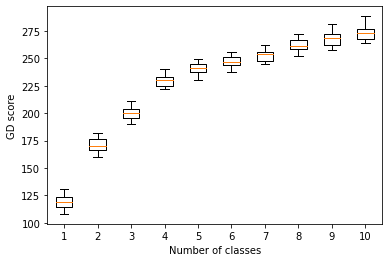

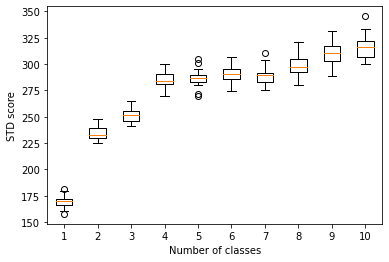

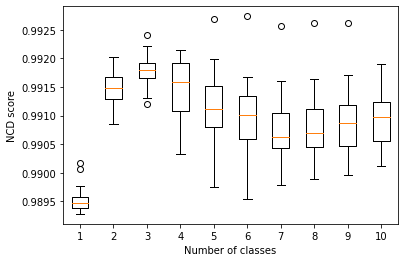

In [ ]:

import matplotlib.pyplot as plt
import pandas as pd
  
dataGD_R1 = {'1': np.array(GD_0).tolist(),'2': np.array(GD_1).tolist(),'3': np.array(GD_2).tolist(),'4': np.array(GD_3).tolist(),'5': np.array(GD_4).tolist(),'6': np.array(GD_5).tolist(),'7': np.array(GD_6).tolist(),'8': np.array(GD_7).tolist(),'9': np.array(GD_8).tolist(),'10': np.array(GD_9).tolist()}
dataSTD_R1= {'1': np.array(STD_0).tolist(),'2': np.array(STD_1).tolist(),'3': np.array(STD_2).tolist(),'4': np.array(STD_3).tolist(),'5': np.array(STD_4).tolist(),'6': np.array(STD_5).tolist(),'7': np.array(STD_6).tolist(),'8': np.array(STD_7).tolist(),'9': np.array(STD_8).tolist(),'10': np.array(STD_9).tolist()}
dataNCD_R1= {'1': np.array(NCD_0).tolist(),'2': np.array(NCD_1).tolist(),'3': np.array(NCD_2).tolist(),'4': np.array(NCD_3).tolist(),'5': np.array(NCD_4).tolist(),'6': np.array(NCD_5).tolist(),'7': np.array(NCD_6).tolist(),'8': np.array(NCD_7).tolist(),'9': np.array(NCD_8).tolist(),'10': np.array(NCD_9).tolist()}



import matplotlib.pyplot as plt
for i in [dataGD_R1,dataSTD_R1,dataNCD_R1 ]:
  plt.boxplot(i.values())
  plt.xticks([1,2,3,4,5,6,7,8,9,10], [1,2,3,4,5,6,7,8,9,10])
  # plt.title("RQ1")
  plt.xlabel("Number of classes")
  plt.grid(color='black', linestyle='', linewidth=0.2)
  
  if i==dataGD_R1:
    # plt.yticks([900,950,1000,1050,1100,1150,1200,1250])
    plt.ylabel("GD score")
    plt.savefig('/content/drive/MyDrive/RQ1new/GD_MNIST/fig/R1_GD_M2.pdf',bbox_inches='tight')
    plt.show()
  if i==dataSTD_R1:
    plt.ylabel("STD score")
    plt.savefig('/content/drive/MyDrive/RQ1new/GD_MNIST/fig/R1_STD_M2.pdf',bbox_inches='tight')
    plt.show()
  if i==dataNCD_R1:
    plt.ylabel("NCD score")
    plt.savefig('/content/drive/MyDrive/RQ1new/GD_MNIST/fig/R1_NCD_M2.pdf', bbox_inches='tight')
    plt.show()

  